In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df = df[['Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros']]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.duplicated().sum()

28

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [8]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float32','float64']).columns
catvars,numvars

(Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price_euros'], dtype='object'))

In [9]:
def valuecounts(col):
    print(f'value counts of the particular col {col} is {df[col].value_counts}')

def uniquevals(col):
    print(f'Details of the particular col {col} is {df[col].unique()}')


for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col Product is ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBo

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


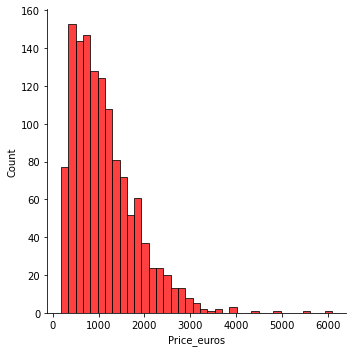

In [12]:
# viewing the distribution of the price

sn.displot(df['Price_euros'], color='red')

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

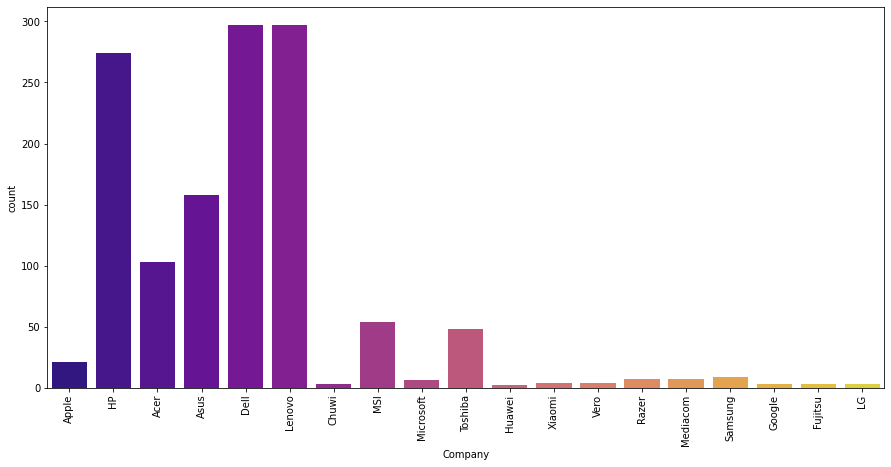

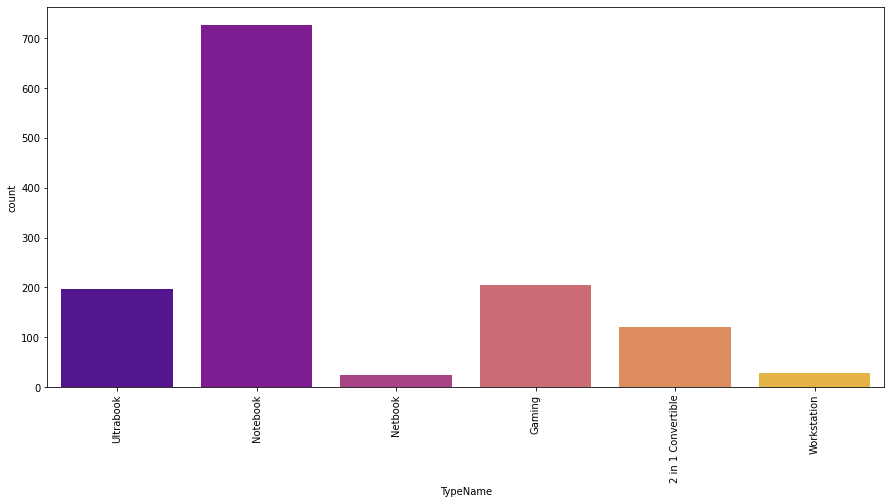

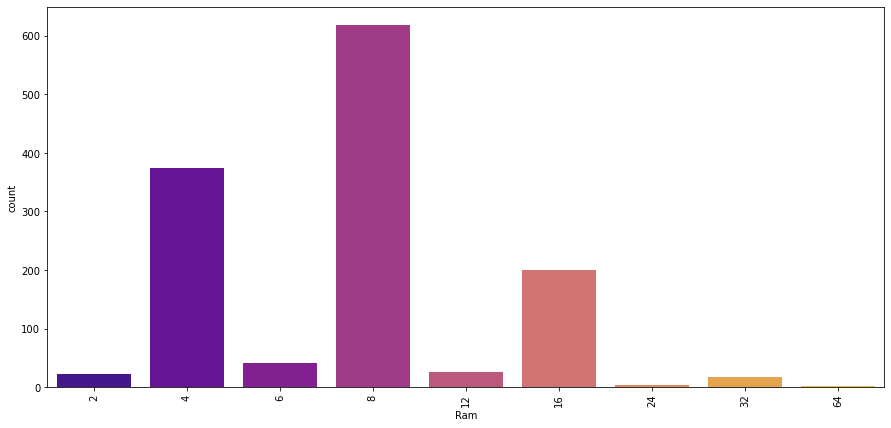

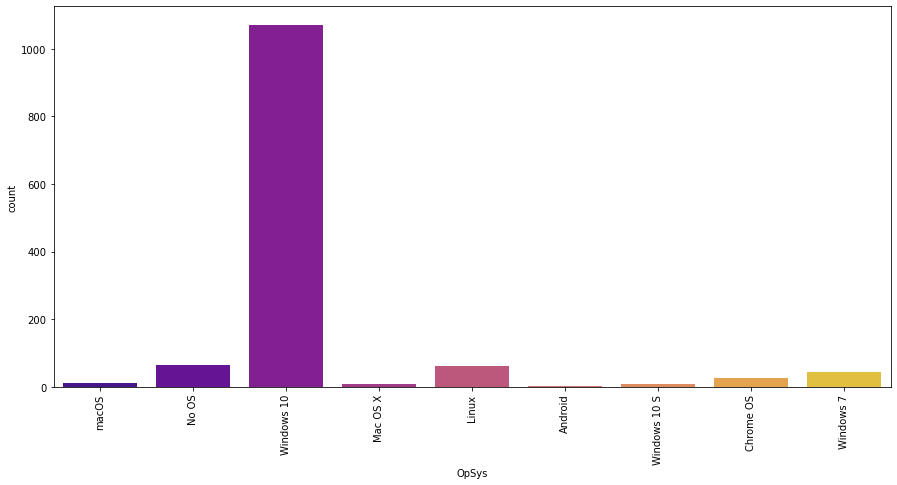

In [13]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

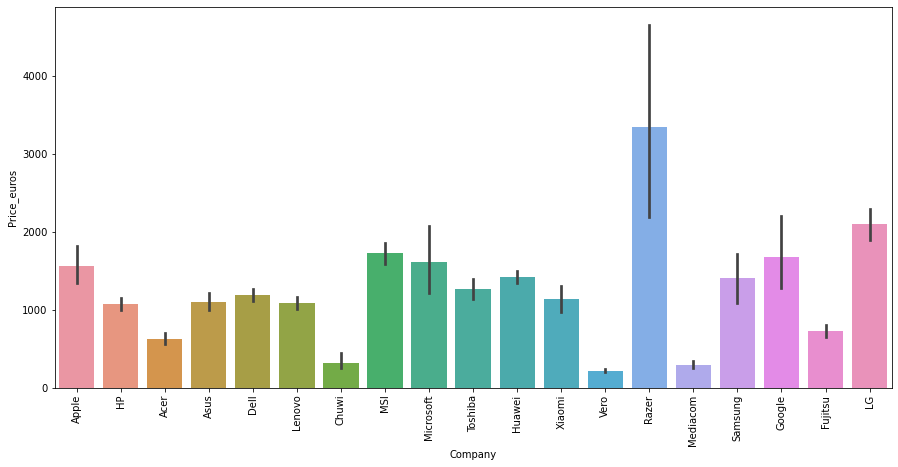

In [14]:
# average of the price by the brand
plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'], y = df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

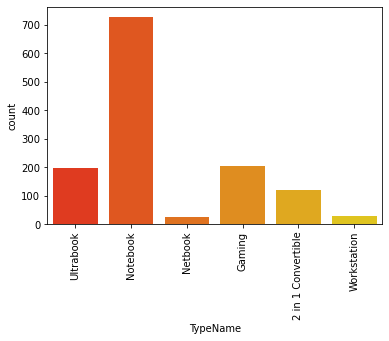

In [15]:
# various type of laptop

sn.countplot(df['TypeName'], palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

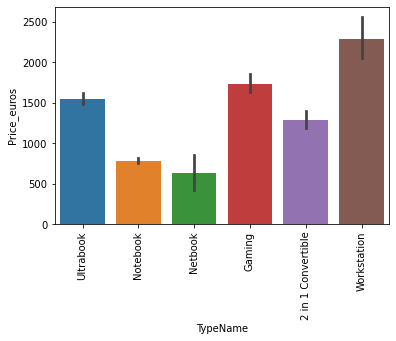

In [16]:
# laptop type and variation about the price

sn.barplot(x= df['TypeName'], y= df['Price_euros'])
plt.xticks( rotation = 'vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

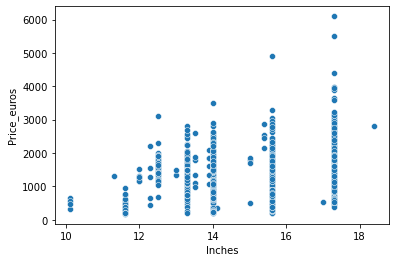

In [17]:
# variation of inches towards the prices

sn.scatterplot(x = df['Inches'], y = df['Price_euros'])

In [18]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                    if 'Touchscreen' in element else 0)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [20]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
1029,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,1080.00,0
473,Dell,Latitude 7390,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42,1841.85,1
462,Asus,Pro P2540UA-AB51,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,749.00,0
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.00,1
597,Lenovo,Thinkpad T470p,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.70,1474.00,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

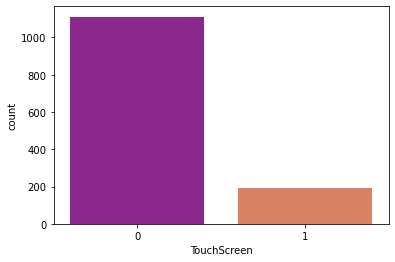

In [21]:
sn.countplot(x=df['TouchScreen'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

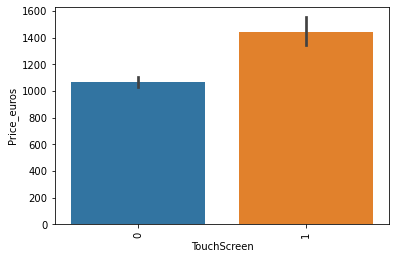

In [22]:
sn.barplot(x=df['TouchScreen'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [23]:

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if 'IPS' in element else 0)

df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
918,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,1349.00,0,0
541,Dell,Vostro 5468,Notebook,14.0,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.60,735.87,0,0
1194,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,1199.00,1,1
297,Dell,Precision 7720,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,2884.86,0,0
647,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,2599.00,0,0


<AxesSubplot:xlabel='IPS', ylabel='count'>

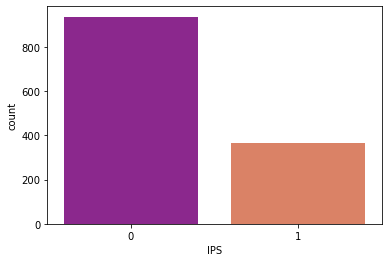

In [24]:
sn.countplot(x=df['IPS'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

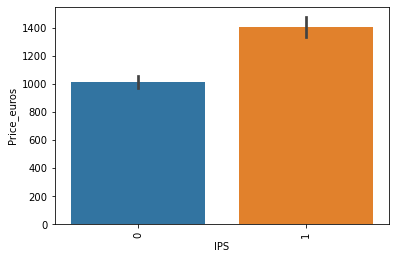

In [25]:
sn.barplot(x=df['IPS'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [26]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [27]:
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [28]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(
    lambda x:x[0]) #extract number in the column

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [29]:
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

<AxesSubplot:>

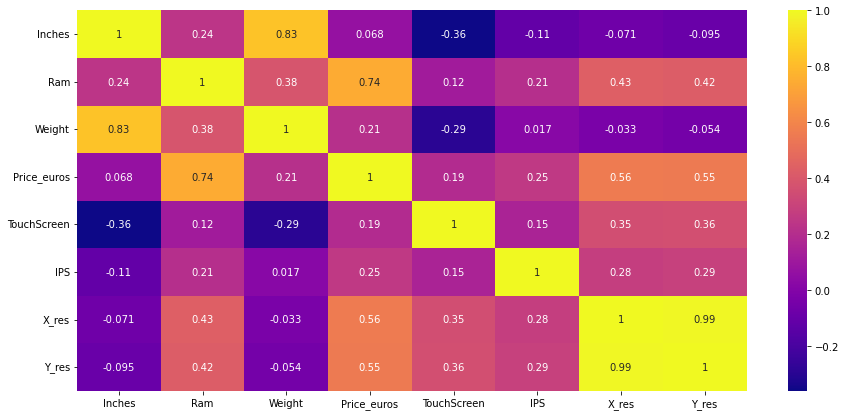

In [30]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='plasma')

In [31]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [32]:
df['PPI'] = ((df['X_res']**2+df['Y_res']**2)**0.5/df['Inches']).astype('float')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [33]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64

In [34]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace = True)
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [35]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [36]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.sample(10)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
320,HP,Elitebook 840,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,1292.0,0,0,157.350512,Intel Core i7
846,HP,Chromebook X360,2 in 1 Convertible,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Chrome OS,1.40,615.0,1,0,135.094211,Intel Celeron Dual
206,Dell,Inspiron 3567,Notebook,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,439.0,1,0,100.454670,Intel Core i3
859,Lenovo,IdeaPad 110-15ISK,Notebook,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.20,469.0,0,0,141.211998,Intel Core i3
853,Lenovo,ThinkPad T470p,Ultrabook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96,1903.0,0,1,157.350512,Intel Core i7
1246,Dell,Latitude 5480,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,875.0,0,0,111.935204,Intel Core i5
152,Lenovo,V110-15IKB (i5-7200U/4GB/128GB/W10),Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,498.0,0,0,100.454670,Intel Core i5
745,Acer,Chromebook 14,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,330.0,0,0,111.935204,Intel Celeron Dual
1277,Acer,Aspire ES1-531,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,289.0,0,0,100.454670,Intel Celeron Dual
614,Dell,Latitude 5580,Notebook,Intel Core i5 7300U 2.6GHz,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,869.0,0,0,100.454670,Intel Core i5


In [37]:
def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

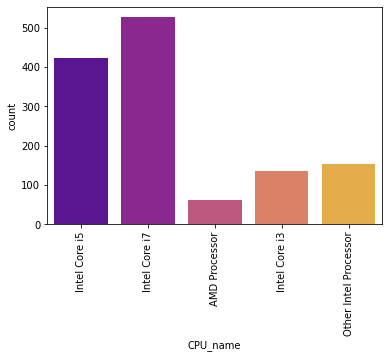

In [38]:
sn.countplot(x=df['CPU_name'], palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

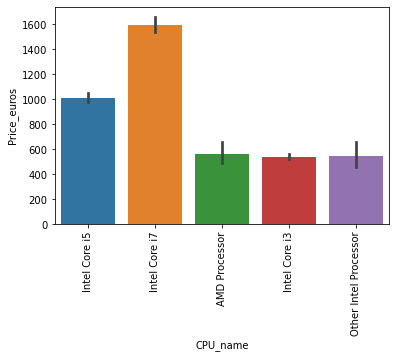

In [39]:
sn.barplot(x=df['CPU_name'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [40]:
df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:xlabel='Ram', ylabel='count'>

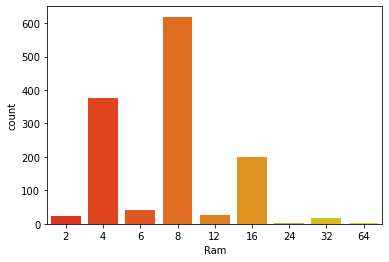

In [41]:
sn.countplot(x=df['Ram'], palette='autumn')

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

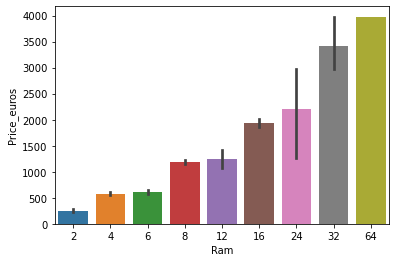

In [42]:
sn.barplot(x=df['Ram'], y=df['Price_euros'])

In [43]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [44]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].astype(str).replace('GB','',regex = True)
df['Memory'] = df['Memory'].astype(str).replace('TB','000',regex = True)

newdf = df['Memory'].str.split("+", n = 1, expand= True)
newdf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [45]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD


In [46]:
def applychanges(value):
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
for value in listtoapply:
    applychanges(value)

df.sample(5)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage
790,Asus,FX502VM-DM560T (i7-7700HQ/8GB/1TB,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX1060,Windows 10,2.24,1339.00,0,0,141.211998,Intel Core i7,128 SSD,0,1,0,0
246,HP,15-bs015dx (i5-7200U/8GB/1TB/W10),Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.04,559.00,1,0,100.454670,Intel Core i5,1000 HDD,1,0,0,0
703,Lenovo,V310-15IKB (i5-7200U/4GB/1TB/FHD/W10),Notebook,4,1000 HDD + 1000 HDD,Intel HD Graphics 620,Windows 10,2.10,621.45,0,0,141.211998,Intel Core i5,1000 HDD,1,0,0,0
1105,Dell,Latitude E5270,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.50,1413.10,0,0,125.367428,Intel Core i5,256 SSD,0,1,0,0
825,Toshiba,Satellite Pro,Notebook,4,128 SSD,Intel HD Graphics 510,Windows 10,1.75,499.00,0,0,111.935204,Other Intel Processor,128 SSD,0,1,0,0


In [47]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

/var/folders/28/b7kmqjl93m5_p5m4k7pkb2bm0000gn/T/ipykernel_79829/3415303436.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [48]:
df['second'] = newdf[1]
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage,second
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [49]:
def applychanges1(value):
    df['Layer2'+value] = df['second'].apply(lambda x:1 if value in x else 0)

df['second'] = df['second'].fillna("0")
for value in listtoapply:
    applychanges1(value)

df['second']= df['second'].str.replace(r'\D','')
df['second'].value_counts()

/var/folders/28/b7kmqjl93m5_p5m4k7pkb2bm0000gn/T/ipykernel_79829/1853105211.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']= df['second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [50]:
df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,...,256,0,1,0,0,0,0,0,0,0


In [51]:
df['HDD'] = (df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash Storage']+df['second']*df['Layer2Flash Storage'])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1HDD', 'Layer2HDD', 'Layer1SSD'
    , 'Layer2SSD', 'Layer1Hybrid', 'Layer2Hybrid', 'Layer1Flash Storage', 'Layer2Flash Storage'], inplace=True)


In [52]:
df.sample(5)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
918,Dell,Inspiron 7567,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,1349.0,0,0,141.211998,Intel Core i7,1000,128,0,0
769,Acer,Aspire A315-31,Notebook,4,1000 HDD,Intel HD Graphics 505,Linux,2.10,298.0,0,0,100.454670,Other Intel Processor,1000,0,0,0
948,Dell,Insprion 5767,Notebook,4,1000 HDD,AMD Radeon R7 M445,Windows 10,2.36,659.0,0,0,106.113062,Intel Core i3,1000,0,0,0
701,Lenovo,IdeaPad 320-15AST,Notebook,4,256 SSD,AMD Radeon 530,Windows 10,2.20,399.0,0,0,141.211998,AMD Processor,0,256,0,0
51,Acer,Aspire A515-51G,Notebook,8,256 SSD,Nvidia GeForce MX150,Windows 10,2.20,841.0,0,1,141.211998,Intel Core i7,0,256,0,0


In [53]:
df.drop(columns=['Memory'], inplace=True)

In [54]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [55]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')

In [56]:
df.drop(columns=['Hybrid'], inplace=True)

In [57]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

<AxesSubplot:xlabel='GPU_Brand', ylabel='count'>

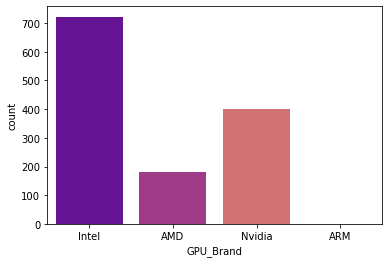

In [58]:
df['GPU_Brand'] = df['Gpu'].apply(lambda text:text.split()[0])
sn.countplot(x=df['GPU_Brand'],palette='plasma')

<AxesSubplot:xlabel='GPU_Brand', ylabel='count'>

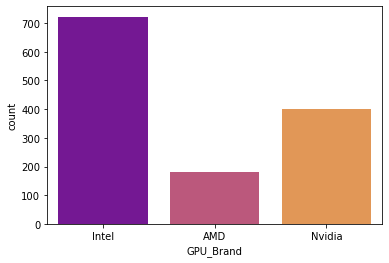

In [59]:
df = df[df['GPU_Brand']!='ARM']
sn.countplot(x=df['GPU_Brand'],palette='plasma')

<AxesSubplot:xlabel='GPU_Brand', ylabel='Price_euros'>

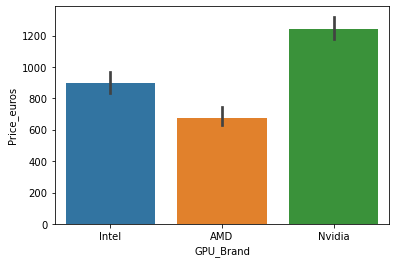

In [60]:
sn.barplot(x=df['GPU_Brand'], y=df['Price_euros'], estimator=np.median)

In [61]:
df.drop(columns=['Gpu'],inplace=True)

In [62]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Flash_Storage,GPU_Brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [63]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

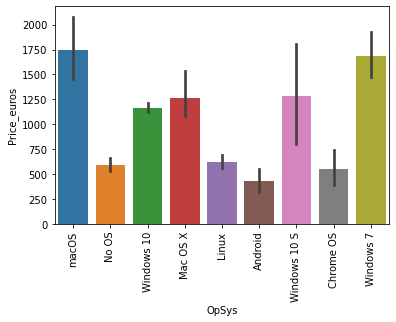

In [64]:
sn.barplot(x=df['OpSys'], y=df['Price_euros'])
plt.xticks(rotation='vertical')

In [65]:
def setcategory(text):

    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'

df['OpSys']= df['OpSys'].apply(lambda x:setcategory(x))

df = df.drop(columns=['Product'],axis=1)

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Flash_Storage,GPU_Brand
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,Intel


(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

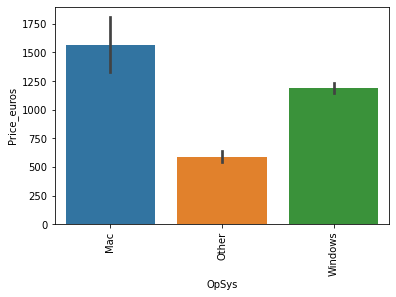

In [66]:
sn.barplot(x=df['OpSys'], y=df['Price_euros'])
plt.xticks(rotation='vertical')

<AxesSubplot:>

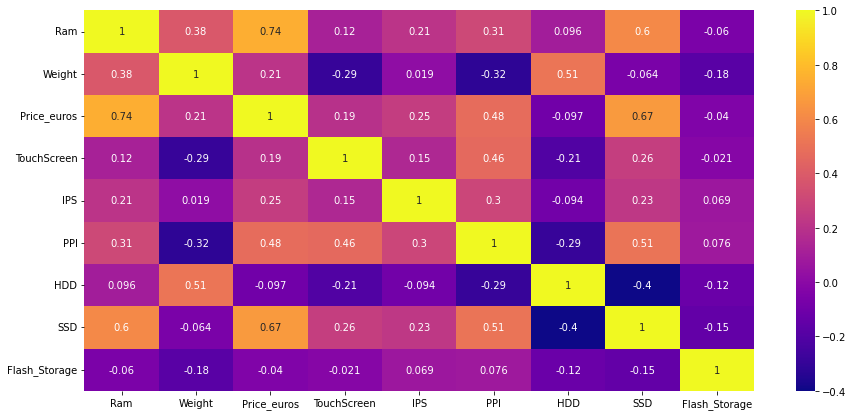

In [67]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='plasma')

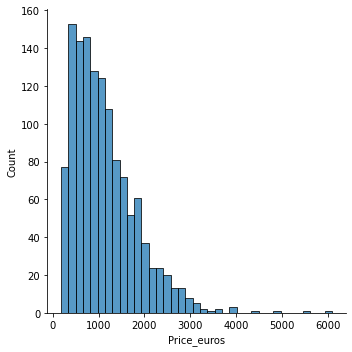

In [68]:
sn.displot(df['Price_euros'])

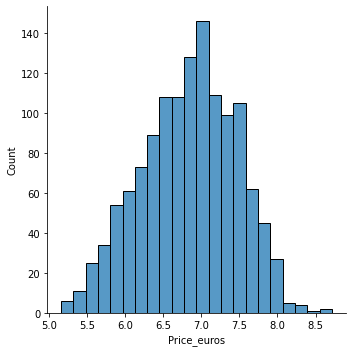

In [69]:
sn.displot(np.log(df['Price_euros']))

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree 

In [71]:
test = np.log(df['Price_euros'])
train = df.drop(['Price_euros'],axis=1)


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test,test_size=0.15,random_state=2)

X_train.shape, X_test.shape

((1106, 13), (196, 13))

In [73]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Flash_Storage',
 12: 'GPU_Brand'}

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1193
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1106 non-null   object 
 1   TypeName       1106 non-null   object 
 2   Ram            1106 non-null   int32  
 3   OpSys          1106 non-null   object 
 4   Weight         1106 non-null   float32
 5   TouchScreen    1106 non-null   int64  
 6   IPS            1106 non-null   int64  
 7   PPI            1106 non-null   float64
 8   CPU_name       1106 non-null   object 
 9   HDD            1106 non-null   int64  
 10  SSD            1106 non-null   int64  
 11  Flash_Storage  1106 non-null   int64  
 12  GPU_Brand      1106 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(5), object(5)
memory usage: 112.3+ KB


# Linear Regression

In [75]:
#col_tnf
step1 = ColumnTransformer(transformers=[
    ('trf', OneHotEncoder(sparse=False, drop='first'),['Company','TypeName','OpSys','CPU_name','GPU_Brand'])
    ], remainder='passthrough')

In [76]:
pipe = Pipeline(steps=[
    ('step1',step1),
    ('step2',LinearRegression())
])

pipe.fit(X_train, Y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_name',
                                                   'GPU_Brand'])])),
                ('step2', LinearRegression())])

In [77]:
y_pred = pipe.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, y_pred))
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))

R2 score 0.8091365125668057
MAE 0.2091926222136118


In [78]:
np.exp(0.21)

1.2336780599567432

# Ridge regression

In [79]:
pipe1 = Pipeline(steps=[
    ('step1',step1),
    ('step2',Ridge(alpha=10))
])

pipe1.fit(X_train, Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_name',
                                                   'GPU_Brand'])])),
                ('step2', Ridge(alpha=10))])

In [80]:
y_pred = pipe1.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, y_pred))
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))

R2 score 0.8144386752165509
MAE 0.20830472044480536


# Lasso Regression

In [81]:
pipe2 = Pipeline(steps=[
    ('step1',step1),
    ('step2',Ridge(alpha=10))
])

pipe2.fit(X_train, Y_train)

y_pred = pipe2.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, y_pred))
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))

R2 score 0.8144386752165509
MAE 0.20830472044480536


# Decision Tree

In [82]:
pipe3 = Pipeline(steps=[
    ('step1',step1),
    ('step2',DecisionTreeRegressor(max_depth=8))
])

pipe3.fit(X_train, Y_train)

y_pred = pipe3.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, y_pred))
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))

R2 score 0.84107818715917
MAE 0.18176321951405433


# Random Forest

In [83]:
pipe4 = Pipeline(steps=[
    ('step1',step1),
    ('step2',RandomForestRegressor(n_estimators=100,
                                    random_state=3,
                                    max_samples=0.5,
                                    max_features=0.75,
                                    max_depth=15))
])

pipe4.fit(X_train, Y_train)

y_pred = pipe4.predict(X_test)

print('R2 score', metrics.r2_score(Y_test, y_pred))
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))

R2 score 0.8830095425921977
MAE 0.1613408116319767


In [132]:
import pickle
#pickle.dump(df,open('df.plk','wb'))
pickle.dump(pipe4,open('pipe.plk','wb'))

In [88]:
train.to_csv('trainned_data.csv', index=None)

# Hyperparameter tunnuing for random forest

In [87]:
transformlist = []
for key,value in mapper.items():
    if key in [0,1,3,8,12]:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'GPU_Brand']

In [89]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Flash_Storage,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,GPU_Brand_Intel,GPU_Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,128,1,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [90]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=2)


[Text(440.8618927609741, 478.60434782608695, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(200.1225401368378, 457.3330434782609, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(132.91291999729035, 436.0617391304348, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(88.74154247391952, 414.7904347826087, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 6.257'),
 Text(35.83983877523371, 393.5191304347826, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 6.208'),
 Text(6.7737162986045245, 372.24782608695654, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 6.611'),
 Text(4.838368784717518, 350.9765217391304, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 6.502'),
 Text(3.870695027774014, 329.70521739130436, 'squared_error = 0.0\nsamples = 1\nvalue = 6.232'),
 Text(5.8060425416610215, 329.70

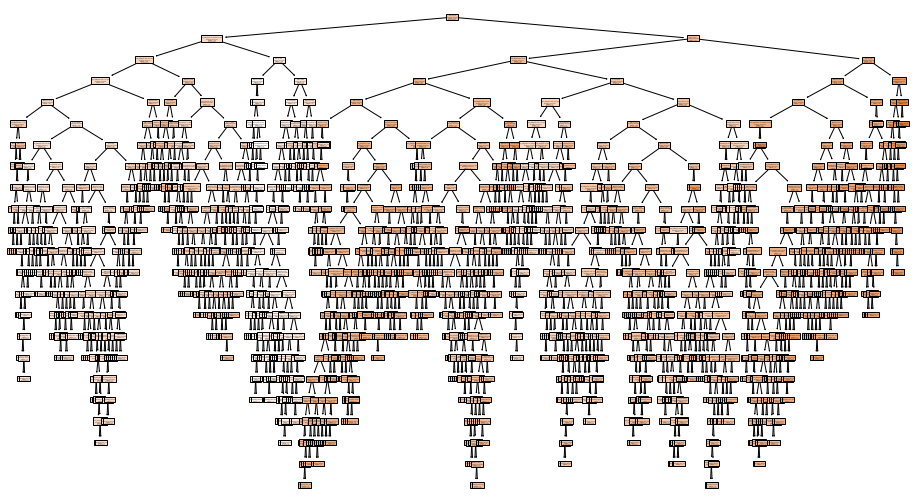

In [91]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [93]:
path = reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas

In [94]:
ccp_alphas

array([0.00000000e+00, 2.56977481e-17, 2.01384258e-12, 1.25921279e-11,
       1.39658331e-11, 1.81593908e-11, 1.08578035e-10, 1.90413407e-10,
       3.52052738e-10, 4.91049146e-10, 5.34151131e-10, 1.67264385e-09,
       1.75885875e-09, 2.06848314e-09, 2.62165021e-09, 3.72228743e-09,
       3.85508876e-09, 4.84153453e-09, 5.07372610e-09, 5.49805278e-09,
       6.03670399e-09, 6.72374014e-09, 6.97093999e-09, 8.29167813e-09,
       9.24814100e-09, 1.05268403e-08, 1.07749519e-08, 1.27531889e-08,
       1.59605996e-08, 1.65552061e-08, 1.68770720e-08, 1.83991886e-08,
       2.02572983e-08, 2.02949504e-08, 2.06392899e-08, 2.39815717e-08,
       2.41668325e-08, 2.62926180e-08, 3.02610142e-08, 3.03537206e-08,
       3.32670950e-08, 3.36607143e-08, 3.58476841e-08, 3.60721856e-08,
       3.90442722e-08, 4.00282623e-08, 4.60335999e-08, 4.74879669e-08,
       4.79685541e-08, 4.86785873e-08, 4.86910357e-08, 5.08932644e-08,
       5.11643383e-08, 5.23330908e-08, 5.37271012e-08, 5.42630695e-08,
      

In [95]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(x_train,y_train)
    alphalist.append(reg)

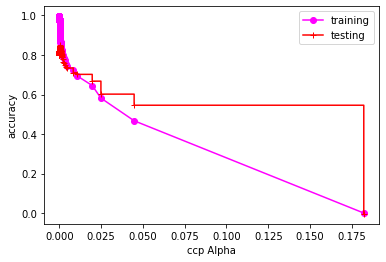

In [96]:
train_score = [reg.score(x_train,y_train) for reg in alphalist]
test_score = [reg.score(x_test,y_test) for reg in alphalist]

plt.xlabel('ccp Alpha')
plt.ylabel('accuracy')

plt.plot(ccp_alphas, train_score, marker='o', label='training', color='magenta')
plt.plot(ccp_alphas, test_score, marker='+', label='testing', color='red', drawstyle='steps-post')
plt.legend()
plt.show()

[Text(446.4, 440.31600000000003, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(223.2, 342.468, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(111.6, 244.62, 'squared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(334.79999999999995, 244.62, 'squared_error = 0.084\nsamples = 106\nvalue = 5.806'),
 Text(669.5999999999999, 342.468, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 7.143'),
 Text(558.0, 244.62, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 6.992'),
 Text(446.4, 146.772, 'squared_error = 0.107\nsamples = 268\nvalue = 7.196'),
 Text(669.5999999999999, 146.772, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 6.8'),
 Text(558.0, 48.924000000000035, 'squared_error = 0.072\nsamples = 59\nvalue = 6.408'),
 Text(781.1999999999999, 48.924000000000035, 'squared_error = 0.096\nsamples = 226\nvalue = 6.902'),
 Text(781.1999999999999, 244.62, 'squar

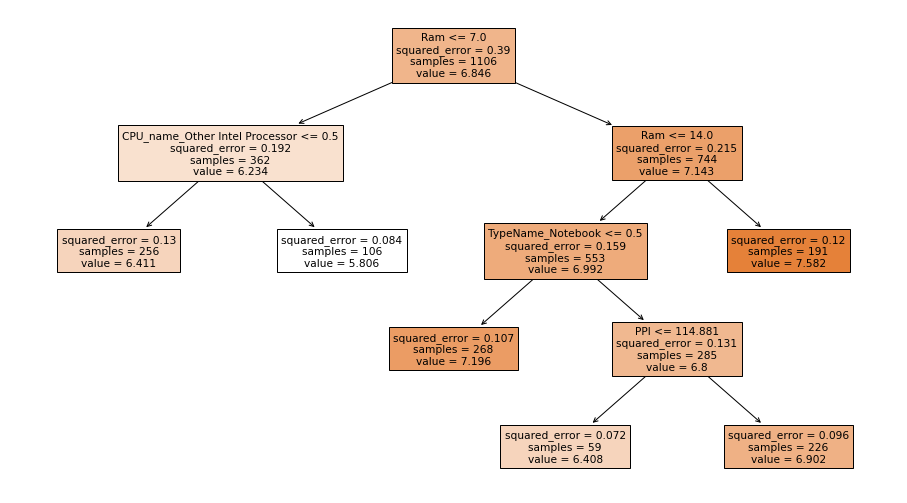

In [99]:
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True, feature_names=train.columns)

In [117]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [122]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(x_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   8.1s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   6.9s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   7.7s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   6.8s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   6.9s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   0.6s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   0.6s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   0.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   0.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   0.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   1.6s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   1.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   1.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   1.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   1.8s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   6.8s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   7.0s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   7.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   7.2s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   6.2s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   3.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   3.7s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   3.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   3.9s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   3.6s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   1.0s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   1.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   1.2s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   1.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   2.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=1077; total time=   4.0s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=1077; total time=   2.2s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=1077; total time=   2.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=1077; total time=   2.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=1077; total time=   2.4s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=833; total time=  34.9s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=833; total time=  28.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=833; total time=  36.1s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=833; total time=  42.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=833; total time=  26.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   6.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   6.6s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   6.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   6.3s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   6.5s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criter

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=1, max_

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criter

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, m

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterio

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [123]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.07369456238166709,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=30,
                        max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=10, n_estimators=588)},
 {'model_name': 'Decision Tree',
  'best_score': -0.12228242409562677,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=15,
                        max_features='log2', min_samples_leaf=10)}]

In [124]:
rf = RandomForestRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=30,
                        max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, n_estimators=588)


rf.fit(x_train,y_train)
print(metrics.r2_score(y_test,rf.predict(x_test)))

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.8299863313100275


In [125]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have vali

[array([7.18636382]),
 array([6.96955245]),
 array([6.74393497]),
 array([7.48628504]),
 array([7.22767299]),
 array([6.22521276]),
 array([7.19750119]),
 array([6.97198574]),
 array([7.47540981]),
 array([7.09880919]),
 array([6.33012059]),
 array([6.22553237]),
 array([7.42893532]),
 array([6.39627097]),
 array([7.18495198]),
 array([7.22767299]),
 array([6.97082709]),
 array([7.48628504]),
 array([6.48135414]),
 array([7.13345197]),
 array([5.80283277]),
 array([7.02812195]),
 array([6.16285723]),
 array([7.08832812]),
 array([7.18376775]),
 array([6.24124441]),
 array([6.96955245]),
 array([6.86866141]),
 array([7.2656546]),
 array([6.70824897]),
 array([5.83816541]),
 array([6.07048469]),
 array([6.33507595]),
 array([7.4959347]),
 array([6.97198574]),
 array([5.81389462]),
 array([6.15918104]),
 array([6.83299605]),
 array([6.4565164]),
 array([6.88015229]),
 array([6.22023668]),
 array([7.4252903]),
 array([6.4896967]),
 array([6.64098142]),
 array([6.89429959]),
 array([7.22767

In [126]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [130]:
df['Predicted Price'] = np.array(ans)
df['GPU_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


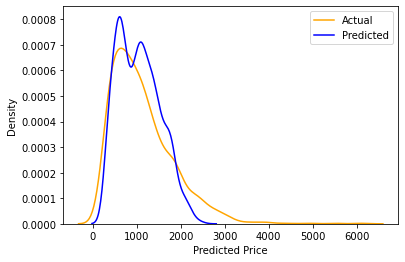

In [128]:
sn.distplot(df['Price_euros'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [133]:
import pickle
pickle.dump(rf,open('model.plk','wb'))